Laura Maria Alzate Vanegas - 1036518185

1. Procesamiento de imágenes con Open CV

In [1]:
import numpy as np
import cv2

In [2]:
def LeerImagen(pathImagen):
    # Cargar la imagen
    imagen = cv2.imread(pathImagen)
    
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar umbralización para separar los objetos de interés
    _, umbral = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Aplicar transformaciones morfológicas para mejorar la segmentación
    kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(umbral, cv2.MORPH_OPEN, kernel, iterations=2)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Encontrar los contornos de los objetos
    contornos, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Dibujar los contornos en la imagen original
    cv2.drawContours(imagen, contornos, -1, (0, 255, 0), 2)
    
    # Mostrar la imagen procesada
    cv2.imshow('Imagen Procesada', imagen)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Contar el número de células
    nroCelulas = len(contornos)
    
    return nroCelulas

In [3]:
#Ejemplo de uso
pathImagen = 'Imagen_celula.jpg'
contarCelulas = LeerImagen(pathImagen)
print("Número de células encontradas:", contarCelulas)

Número de células encontradas: 47


2. Visualización de imágenes DICOM con PyDICOM

In [4]:
import os
import pydicom
import matplotlib.pyplot as plt

In [5]:
def load_dicom_images(folder_path):
    dicom_files = [file for file in os.listdir(folder_path) if file.endswith('.dcm')]
    dicom_files.sort()
    dicom_images = [pydicom.dcmread(os.path.join(folder_path, file)) for file in dicom_files]
    return dicom_images

def display_dicom_images(dicom_images):
    fig, ax = plt.subplots()
    index = 0

    def on_close(event):
        plt.close()
        display_dicom_images.running = False

    fig.canvas.mpl_connect('close_event', on_close)

    while index < len(dicom_images) and display_dicom_images.running:
        ax.imshow(dicom_images[index].pixel_array, cmap=plt.cm.gray)
        ax.set_title('Dicom image')
        ax.axis('off')
        plt.pause(0.5) 
        plt.draw()
        index += 1

    plt.close()

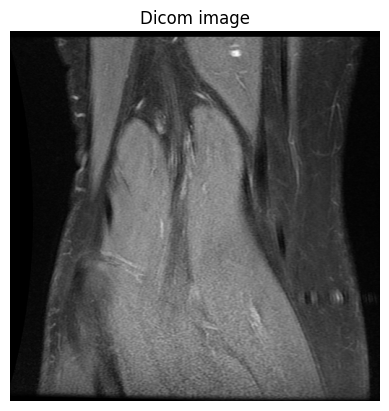

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
#Ejemplo de uso
folder_path = 'archivosDCM'
dicom_images = load_dicom_images(folder_path)
display_dicom_images.running = True  # Variable para controlar la ejecución
display_dicom_images(dicom_images)